### Exploratory data analysis for griding mill wear data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

%matplotlib inline

In [2]:
features = pd.read_excel('../Paper/WearPaper/new_data/time_energy_wear_rate_forK2_new.xlsx')
features= features.drop('id', axis = 1)
# features= features.drop('k1', axis = 1)
features= features.drop('k/H', axis = 1)
features= features.drop('wear_rate_percentage', axis = 1)
features= features.drop('wear_rate(mm/hr)', axis = 1)
features= features.drop('h', axis = 1)
# features= features.drop('z', axis = 1)
features= features.drop('Hardness', axis = 1)
features= features.drop('A', axis = 1)
features= features.drop('h/z', axis = 1)
features= features.drop('normT', axis = 1)
features= features.drop('atan', axis = 1)
# features= features.drop('T', axis = 1)
features= features.drop('E/A', axis = 1)
features= features.drop('averageE', axis = 1)
features= features.drop('total', axis = 1)
features= features.drop('normE(1e6J/s)', axis = 1)
# features= features.drop('normh', axis = 1)
# features= features.drop('const', axis = 1)
features= features.drop('const2', axis = 1)
features= features.drop('ratio', axis = 1)
features= features.drop('tangE(1e6J/s)', axis = 1)

df = features
df1 = df[df['d/mesh'].isin([3])]
df = features
df2 = df[df['d/mesh'].isin([4.5])]
df = features
df3 = df[df['d/mesh'].isin([7.2])]



In [3]:
# Check for missing data
df.isnull().sum()

z            0
d/mesh       0
T            0
normz        0
normh        0
k1           0
normTotal    0
dtype: int64

In [4]:
# Statitstical analysis
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
z,360.0,10.935725,8.357754,0.119710,1.801690,11.341830,20.133980,22.000000
d/mesh,360.0,4.900000,1.740233,3.000000,3.000000,4.500000,7.200000,7.200000
T,360.0,25.000000,11.195901,10.000000,17.500000,25.000000,32.500000,40.000000
normz,360.0,0.497078,0.379898,0.005441,0.081895,0.515538,0.915181,1.000000
normh,360.0,0.593326,0.298906,0.007440,0.344449,0.614138,0.889958,0.981970
k1,360.0,17.499843,43.558871,0.024146,2.135776,5.814199,13.196345,449.452069
normTotal,360.0,0.436650,0.316376,0.000589,0.138420,0.376066,0.700730,1.000000


In [5]:
# plt.figure(figsize=(10,6))
# sns.distplot(df, bins=40)


In [6]:
# remove outliers
#df1 -> q_hi  = df["k1"].quantile(0.84)
#df2 -> q_hi  = df["k1"].quantile(0.86)
#df3 -> q_hi  = df["k1"].quantile(0.9)

# filter df1 (when d/mesh=3)
q_low = df1["k1"].quantile(0.0)
q_hi  = df1["k1"].quantile(0.84)
df_filtered = df1[(df1["k1"] < q_hi) & (df1["k1"] > q_low)]
df1 = df_filtered
newdf = df1

# write to csv
# df1.to_csv('../Paper/WearPaper/new_data/filtered_d_over_mesh_3.csv')

# filter df2 (when d/mesh=4.5)
q_low = df2["k1"].quantile(0.0)
q_hi  = df2["k1"].quantile(0.86)
df_filtered = df2[(df2["k1"] < q_hi) & (df2["k1"] > q_low)]
df2 = df_filtered
# write to csv
# df2.to_csv('../Paper/WearPaper/new_data/filtered_d_over_mesh_4.5.csv')

# filter df3 (when d/mesh=7.2)
q_low = df3["k1"].quantile(0.0)
q_hi  = df3["k1"].quantile(0.9)
df_filtered = df3[(df3["k1"] < q_hi) & (df3["k1"] > q_low)]
df3 = df_filtered
# write to csv
# df3.to_csv('../Paper/WearPaper/new_data/filtered_d_over_mesh_7.2.csv')


newdf = newdf.append(df2)
newdf = newdf.append(df3)
# df.describe().transpose()


newdf.to_csv('../Paper/WearPaper/new_data/filtered_all.csv')
newdf.shape

(308, 7)

Text(0.5, 0, 'd/mesh')

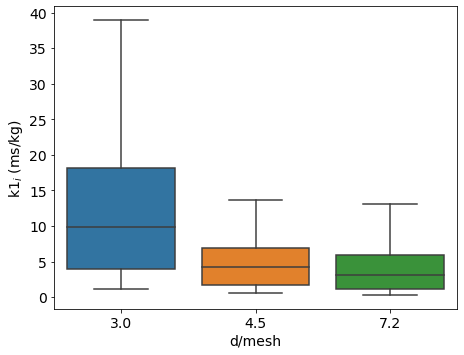

In [7]:
# Box plot

plt.rc('axes', labelsize=14) #font size of axes label
plt.rc('ytick', labelsize=14) #font size of tick label
plt.rc('xtick', labelsize=14) #font size of tick label
fig = plt.figure(figsize=[8,6])
ax = fig.add_axes([0.2,0.2,0.7,0.7])





# plt.xlim(127, 3000)
# ax.text(0.1, 0.8, r'Q1', fontsize=18)
# ax.text(-0.3, 1.1, r'median', fontsize=18)
# ax.text(0.1, 1.3, r'Q3', fontsize=18)
# Box plot
sns.boxplot(x='d/mesh',y='k1',data=newdf)
plt.ylabel("k1$_i$ (ms/kg)")
plt.xlabel("d/mesh")

# Violin plot
# sns.violinplot(x='N',y='newE',data=df, inner='quartiles')
# plt.ylabel("Predicted E$_i$ (W/kg)")
# plt.xlabel("N")

# path = "../Paper/WearPaper/fig"
# fout = os.path.join(path, "boxPlot_J.jpg")
# plt.savefig(fout, dpi=300)

# selected = df['D'] == 127
# df = df[selected]
# df['newE'].describe()
# fig.savefig(fout, dpi=300)
